In [5]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
traffic = pd.read_json('./network_log.json')

In [11]:
traffic.head()

,error,error_message,response_code,response_ok,response_time,unixtime,url,url_index
0,None,None,200,True,0.182620,1507916293,http://www.google.com,0
1,None,None,200,True,0.350205,1507916294,http://www.facebook.com,1
2,None,None,200,True,0.048498,1507916293,http://www.apple.com,2
3,None,None,200,True,0.238952,1507916293,http://www.microsoft.com,3
4,None,None,200,True,0.049137,1507916293,http://mbusa.com,5


<IPython.core.display.Javascript object>


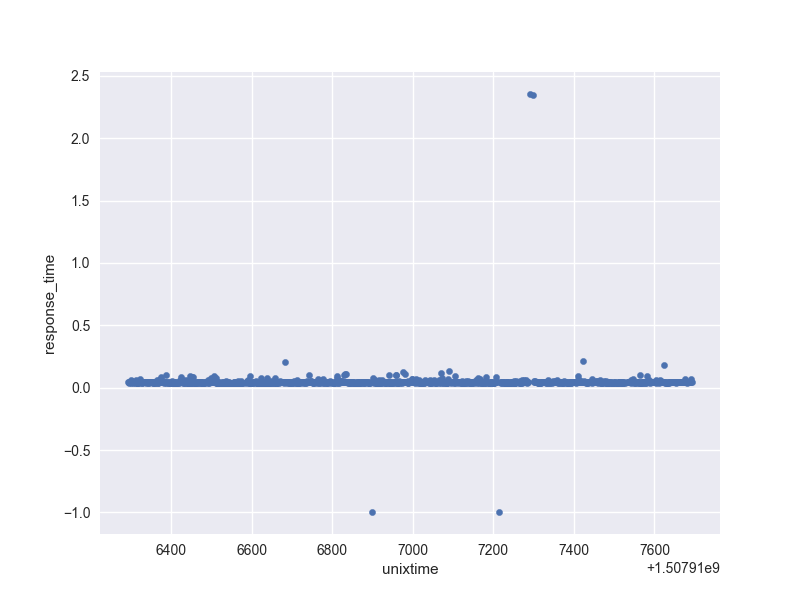

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
traffic[traffic['url_index']==5].plot(x='unixtime', y='response_time', ax=ax, kind='scatter')
# traffic.plot(x='unixtime', y='response_time', ax=ax, kind='scatter')

In [9]:
traffic['response_code'].unique()

array([200,  -1])